In [ ]:
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
import re

In [ ]:
bearer = 'AAAAAAAAAAAAAAAAAAAAAG7kYgEAAAAAjAUnWX9h31yesBd5T40LvyRD2%2B4%3DStAQqYAEsytopP8cj2n15RTafo7eKbPstQvvq0TBKYHgzg2LnS'

In [ ]:
#we perform the tweets crawling from Twitter
headers = {'Content-type': 'application/json','Authorization': 'Bearer '+bearer}
query = 'operating profit lang:en'
max_results = 10
params = {'query':query, 'max_results': max_results}
data = list()
next_token=0
while next_token != None:
    if next_token:
        params['next_token']=next_token
    response = requests.get('https://api.twitter.com/2/tweets/search/recent', headers=headers, params=params)
    response = json.loads(response.content.decode())
    #print('risposta',response)
    try: 
        next_token = response['meta']['next_token']
    except:
        next_token=None
    data.extend(response['data'])

KeyboardInterrupt: 

In [ ]:
len(data)

40

In [ ]:
data

In [ ]:
# we generate a dataframe from the retrieved tweets
df = pd.DataFrame(data)
df.shape

In [ ]:
df.head()

In [ ]:
df['text'] = df['text'].drop_duplicates(keep=False, inplace=False)
df.dropna(inplace=True)

In [ ]:
df.shape

In [ ]:
df.to_csv('tweets.csv', index=False)

In [ ]:
df=pd.read_csv('tweets.csv')
df.head()

,Unnamed: 0,id,text
0,2,1491734262420176901,The nitrile rubber production cost analysis re...
1,13,1491731365217193985,The potassium iodide production cost analysis ...
2,14,1491731209596317696,RT @SecretsReveal19: @idesibanda Restructure m...
3,17,1491730776861573126,"Zurich operating profit of 2021 jumps 35%, set..."
4,19,1491730326351224833,Our full-year revenue and operating profit (EB...


In [ ]:
del df['Unnamed: 0']

In [ ]:
df.head()

,id,text
0,1491734262420176901,The nitrile rubber production cost analysis re...
1,1491731365217193985,The potassium iodide production cost analysis ...
2,1491731209596317696,RT @SecretsReveal19: @idesibanda Restructure m...
3,1491730776861573126,"Zurich operating profit of 2021 jumps 35%, set..."
4,1491730326351224833,Our full-year revenue and operating profit (EB...


In [ ]:
df['text'] = df['text'].drop_duplicates(keep=False, inplace=False)
df.dropna(inplace=True)

In [ ]:
df.shape

(799, 2)

In [ ]:
df

,id,text
0,1491734262420176901,The nitrile rubber production cost analysis re...
1,1491731365217193985,The potassium iodide production cost analysis ...
2,1491731209596317696,RT @SecretsReveal19: @idesibanda Restructure m...
3,1491730776861573126,"Zurich operating profit of 2021 jumps 35%, set..."
4,1491730326351224833,Our full-year revenue and operating profit (EB...
...,...,...
794,1489969444256239616,@chartbent Operating profit has increased to 1...
795,1489966540095205380,"@Harvard2H ""[Dutch insurer Aegon NV (https://t..."
796,1489965610033319936,RT @LavaCreekVOS: Lionsgate reaches 31.4M in g...
797,1489963133880119296,$SNAP Quick question for the gurus in here...W...


In [ ]:
# Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub('#', ' ', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', ' ', text) # Removing RT
    text = re.sub('\n', ' ', text)
    text = re.sub('@+', ' ', text) # Removing RT
    text = re.sub("'", ' ', text)
    text = re.sub(',', ' ', text)
    text = re.sub(':', ' ', text)
    text = re.sub('Tweet &amp; Tr…', ' ', text)
    text = re.sub('https?:\/\/\S+', ' ', text) # Removing hyperlink
    text = re.sub('https \/\/\S+', ' ', text)
    text = re.sub('https\/\/\S+', ' ', text)
    return text

#applying this function to Text column of our dataframe
df["text"] = df["text"].apply(cleanTxt)

In [ ]:
df.shape

(799, 2)

In [ ]:
df['text'].iloc[30]

'Yamaha Motor FY21 Profit Surges; Sees Weak Net Profit  Higher Operating Profit In FY22; Stock Down - Nasdaq    '

In [ ]:
df.head(100)

,id,text
0,1491734262420176901,The nitrile rubber production cost analysis re...
1,1491731365217193985,The potassium iodide production cost analysis ...
2,1491731209596317696,SecretsReveal19 idesibanda Restructure maj...
3,1491730776861573126,Zurich operating profit of 2021 jumps 35% set...
4,1491730326351224833,Our full-year revenue and operating profit (EB...
...,...,...
95,1491572018751414276,xC0RNH0li0x ndm1981 shinobi602 Don t tell m...
96,1491571053444825091,6 | 20% Non-GAAP Long-Term Profit Margin Model...
97,1491570499977101314,Leaky_cheese Company wide its a ~42% profit m...
98,1491570116777189376,Japanese carmaker Honda Motor now expects an ...


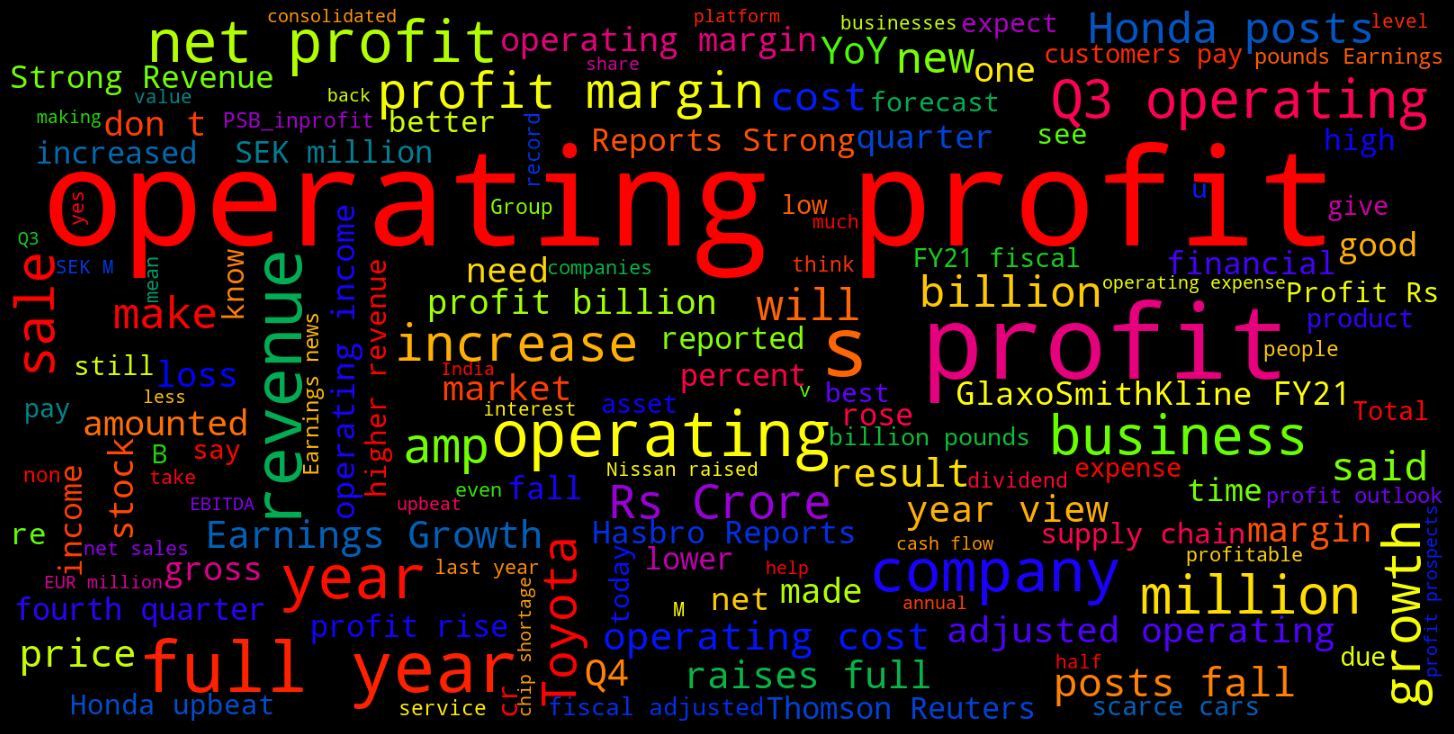

In [ ]:
from wordcloud import WordCloud, STOPWORDS
# word cloud visualization
def word_cloud(text):
    stopwords = set(STOPWORDS)
    allWords = ' '.join([twts for twts in text])
    wordCloud = WordCloud(background_color='black',width = 1600, height = 800,stopwords = stopwords,min_font_size = 20,max_font_size=150,colormap='prism').generate(allWords)
    fig, ax = plt.subplots(figsize=(20,10), facecolor='k')
    plt.imshow(wordCloud)
    ax.axis("off")
    fig.tight_layout(pad=0)
    plt.show()

#print('Wordcloud for ' + query)
word_cloud(df['text'].values)

In [ ]:
df.to_csv('tweets.csv', index=False)